> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: Ihis dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
'ScheduledDay' tells us on what day the patient set up their appointment.<br>
'Neighborhood' indicates the location of the hospital.<br>
'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br>
'PatientID' indicates the patient ID <br>
'AppointmentID' indicates the appointment ID <br>
'Gender' indicates the Gender of the patient <br>
'Age' indicates the age of the patient <br>
'No-show' indicates if the patient shows for the appointment <br>


### Question(s) for Analysis
>**Tip**: 
-What factor are impacting the patient to show for their appointment ? <br>
-what is the percentage of people who show for the appointment ? <br>
-What are the statistics for the genders ? <br>
-Is there a relation between 'SMS_Received' and 'No-show' ? <br>
-Is there a relation between 'Diabetes', 'Hypertension' and 'No-show' ? <br>
-Is there a relation between the patient age and the attendance ? <br>

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
#### Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [32]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0;

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [2]:
# Load the data from CSV file with pandas
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Check the size of the Dataframe
# There are 110527 lines and 14 columns
df.shape

(110527, 14)

In [5]:
# checking the data consistency and missing dat
# There are no missing datas in the fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Drop some colums not useful for the analysis
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True);
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Exploring some statistics from the fields
#75% of the people age is 55 and the mean age is 37
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The mean age is **37** and the max is **115** <br>
**75%** of the patient age is 55 <br>
**9.8%** of the patient are enrolled in Brasilian welfare program Bolsa Família <br>

In [8]:
# Drop the row with the age of -1
df.drop(df[df.Age == -1].index,inplace=True)

In [9]:
# Check if there are duplicates values
# There are 635  duplicates values in the dataframe
df.duplicated().sum()

635

In [10]:
# Drop duplicated lines
df.drop_duplicates(inplace=True)
# Check the new number of lines
df.shape

(109891, 12)

In [11]:
# Check the number of unique values
df.nunique()

Gender                 2
ScheduledDay      103548
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [12]:
# Rename some columns
df.rename(columns={'No-show':'No_show','Handcap':'Handicap','Hipertension':'Hypertension'},inplace=True)
df.head(2)
#The correction is OK

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [13]:
df['ScheduledDay'] = df['ScheduledDay'].str[0:10]
df['AppointmentDay'] = df['AppointmentDay'].str[0:10]
df.head(2)
# The dates forming is now quite OK

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 : What is the ratio of people showing for the appointment ?

In [14]:
# compute the number of people who show and not show
df['No_show'].value_counts()

No     87793
Yes    22098
Name: No_show, dtype: int64

#### Creating a function for the repetitive code

In [15]:
def percentage(Num, Denum):
    return Num/Denum

In [16]:
# Compute the ratio of people who show for the appointment
show_yes = df[df['No_show'] == 'No']
Perc_show = percentage(show_yes['No_show'].count(),df['No_show'].count())
print(Perc_show)
#Percentage of people who show for the appointment

0.79890982883


In [17]:
# Compute the ratio of people who didn't show for the appointment
show_no = df[df['No_show'] == 'Yes']
Perc_show_no = percentage(show_no['No_show'].count(),df['No_show'].count())
print(Perc_show_no)
#Percentage of people who didn't show for the appointment

0.20109017117


### Pie Chart for the percentage of people show and no-show

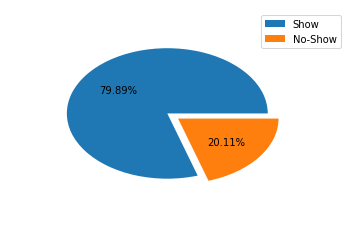

In [18]:
# Pie chart for the percentage of people shows
sizes = np.array([Perc_show, Perc_show_no])
myexplode = [0.1,0]
labels = 'Show','No-Show'
plt.pie(sizes, radius=0.75, autopct='%.2f%%',explode=myexplode);
plt.legend(labels);

### The age repartition

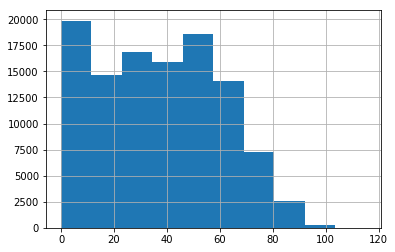

In [19]:
df['Age'].hist();
#There are people of every ages from 0 to more than 100 !

There are are people for each ages from 0 to 115

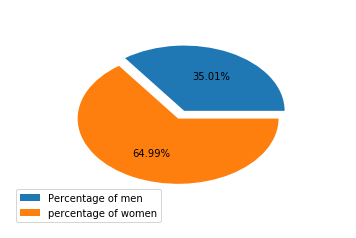

In [21]:
# men and women dataframe for percentage calculation
df_men = df[df['Gender'] == 'M']
df_women = df[df['Gender'] == 'F']
# percentage of men and womes
perc_men = percentage(df_men['Gender'].count(),df['No_show'].count())
perc_women = percentage(df_women['Gender'].count(),df['No_show'].count())
#There are 65% of Women than Men
#Plotting Pie Charts for Gender repartition
sizes = np.array([perc_men, perc_women])
myexplode = [0.1,0]
labels = 'Percentage of men','percentage of women'
plt.pie(sizes,autopct='%.2f%%',radius=0.75,explode=myexplode);
plt.legend(labels);

**Gender** : There are **65%** of women for this data frame

### Appointment per Gender

In [22]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
Show_gender = df['No_show'].groupby(df['Gender']).value_counts()
Show_gender
# Displaying the Shows statistics per Gender

Gender  No_show
F       No         56961
        Yes        14455
M       No         30832
        Yes         7643
Name: No_show, dtype: int64

Plot for the Show per Gender

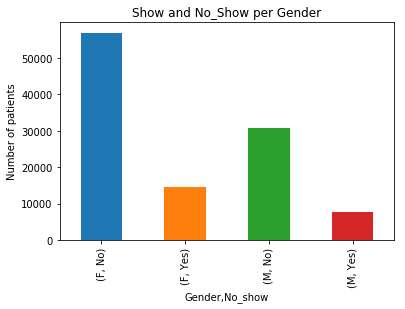

In [23]:
Show_gender.plot(x=['F','M'],y=['No','Yes'], kind='bar',title="Show and No_Show per Gender");
plt.ylabel("Number of patients");

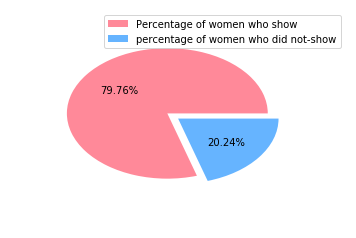

In [24]:
# Ratio of petient to show or not per Gender
df_women = df[df["Gender"] == 'F']
#Total Number of women
nb_women = df_women["Gender"].count()
# Number of women to show
df_women_show = df_women[df_women['No_show'] == "No"]
df_women_nshow = df_women[df_women['No_show'] == "Yes"]
# Number of women to show
nb_women_show = df_women_show['No_show'].count()
# Number of women to not show
nb_women_nshow = df_women_nshow['No_show'].count()
#Percentage of women to show or not
Perc_women_show = percentage(nb_women_show,nb_women)
Perc_women_nshow = percentage(nb_women_nshow,nb_women)

#Plot Pie chart
sizes = np.array([Perc_women_show, Perc_women_nshow])
myexplode = [0.1,0]
labels = 'Percentage of women who show','percentage of women who did not-show'
colors = ['#ff8999','#66b4ff']
plt.pie(sizes,autopct='%.2f%%',radius=0.75,explode=myexplode, colors=colors);
plt.legend(labels);

There are **79.76%** of Women to Show for their appointment

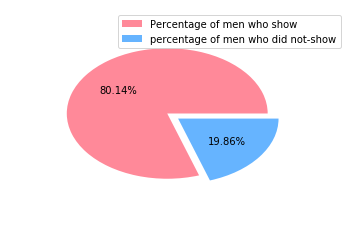

In [25]:
# Ratio of petient to show or not per Gender
df_men = df[df["Gender"] == 'M']
#Total Number of men
nb_men = df_men["Gender"].count()
# Number of men to show
df_men_show = df_men[df_men['No_show'] == "No"]
df_men_nshow = df_men[df_men['No_show'] == "Yes"]
# Number of men to show
nb_men_show = df_men_show['No_show'].count()
# Number of men to not show
nb_men_nshow = df_men_nshow['No_show'].count()
#Percentage of men to show or not
Perc_men_show = percentage(nb_men_show,nb_men)
Perc_men_nshow = percentage(nb_men_nshow,nb_men)

#Plot Pie chart
sizes = np.array([Perc_men_show, Perc_men_nshow])
myexplode = [0.1,0]
labels = 'Percentage of men who show','percentage of men who did not-show'
colors = ['#ff8999','#66b4ff']
plt.pie(sizes,autopct='%.2f%%',radius=0.75,explode=myexplode, colors=colors);
plt.legend(labels);

There are **80.14%** of Women to Show for their appointment

### Research Question 2 : What is the impact of the factors like SMS_Receive, Handicap and Age on the decision to show or not ?

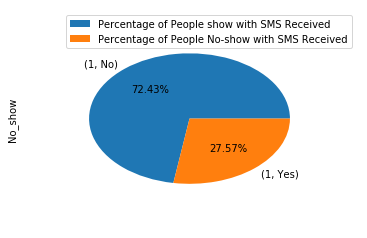

In [26]:
# Dataframe for the SMS received patient
df_sms1 = df[df["SMS_received"] == 1]
df_sms1 = df_sms1["No_show"].groupby(df['SMS_received']).value_counts()
#Plot Pie chart for attendace with SMS received
df_sms1.plot(kind='pie',autopct='%.2f%%',radius=0.75)
labels = 'Percentage of People show with SMS Received','Percentage of People No-show with SMS Received'
plt.legend(labels);

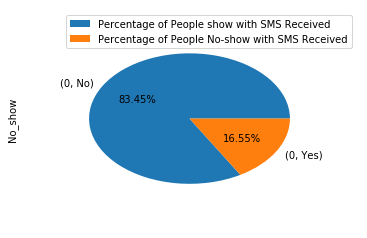

In [27]:
# Dataframe for the No SMS received patient
df_sms0 = df[df["SMS_received"] == 0]
df_sms0 = df_sms0["No_show"].groupby(df['SMS_received']).value_counts()
#Plot Pie chart for attendace without SMS received
df_sms0.plot(kind='pie',autopct='%.2f%%',radius=0.75)
labels = 'Percentage of People show with SMS Received','Percentage of People No-show with SMS Received'
plt.legend(labels);

There is no big impact of the **SMS_Receive** on the appointment <br>
**72.43%** of people who have received a SMS attend for the appointment but also **83.45%** of people who didn't received a SMS attend for the appointment

#### Relation between Weekday and Appointment

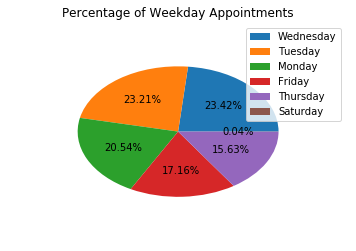

In [28]:
# Dataframe for the weekDay
df_Day = pd.to_datetime(df['AppointmentDay']).dt.weekday.rename("Weekday")
#Percentage of appointments per week day
df_Day_perc = np.divide(df_Day.value_counts(),df_Day.count())

#Plot a pie chart
sizes = np.array(df_Day_perc)
labels = 'Wednesday','Tuesday','Monday','Friday','Thursday','Saturday'
plt.pie(sizes,autopct='%.2f%%',radius=0.75);
plt.title("Percentage of Weekday Appointments");
plt.legend(labels,loc="best");

The majority of the appointments are done on : <br>
**Wednesday : 23.42%** <br>
**Tuesday : 23.21%** <br>
**Monday : 20.54%**  <br>
There are no appointment on **Sunday** and almost no appointment on **Saturday** 

#### Relation between Scholarship and Appointment

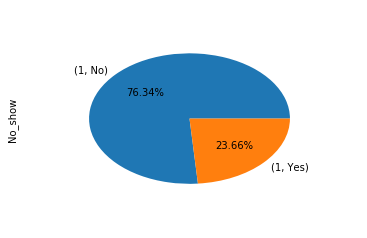

In [29]:
# Dataframe for Show groupby Scholarship
df_scholar = df[df['Scholarship'] == 1]
df_scholar = df_scholar['No_show'].groupby(df['Scholarship']).value_counts()
#Pie Plot with percentages for the Scholarship and attendance
df_scholar.plot(kind='pie',autopct='%.2f%%',radius=0.75);

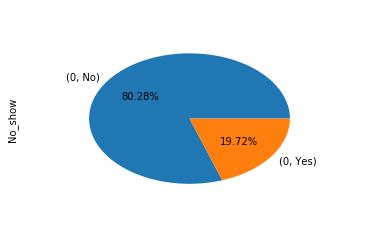

In [30]:
# Dataframe for Show groupby Scholarship
df_scholar = df[df['Scholarship'] == 0]
df_scholar = df_scholar['No_show'].groupby(df['Scholarship']).value_counts()
#Pie Plot with percentages for the Scholarship and No attendance
df_scholar.plot(kind='pie',autopct='%.2f%%',radius=0.75);

 The scholarship is not necessary on the patient to show or not for their appointment <br>
**80.28%** of the patient without a scholarship show up for their appointment<br>
And **76.34%** of the patient with a scholarship show up for their appointment.

#### Relation between Handicap and No_Show

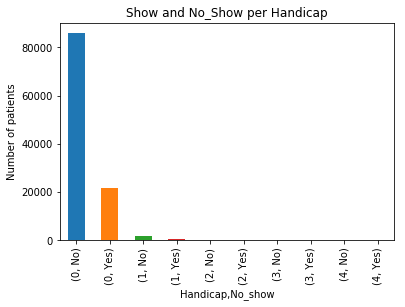

In [31]:
# Dataframe for Show groupby Scholarship
df_Handicap = df['No_show'].groupby(df['Handicap']).value_counts()

#Pie Plot with percentages for the Scholarship and No_show feedback
df_Handicap.plot(kind='bar',title="Show and No_Show per Handicap");
plt.ylabel("Number of patients");

#### Relation between Age and Appointment

In [32]:
#Statistics for the Age column
df.Age.describe()

count    109891.000000
mean         37.089853
std          23.121015
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [33]:
#Creating some ranges for the ages 
age_levels =[0,18,37,55,115]
age_names = ['Young','Junior','Senior','Old']
df['Age_label'] = pd.cut(df['Age'], age_levels, labels = age_names)
#Number of people per age levels
df_age = df.groupby(df.Age_label).count()
df_age['No_show']
#Compute the number of Show up people per age levels
df_age_show = df[df.No_show == 'No'].groupby('Age_label').count()
df_age_show['No_show']
#Compute the percentage of attendance per Age level
Perc_att_age = np.divide(df_age_show['No_show'], df_age['No_show'])
Perc_att_age

Age_label
Young     0.775140
Junior    0.765582
Senior    0.805690
Old       0.844397
Name: No_show, dtype: float64

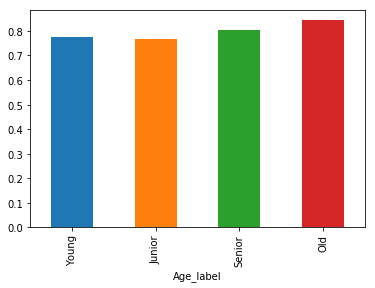

In [169]:
#Plot a Bar Chart for the attendance per Age levels
Perc_att_age.plot(kind='bar');

The probability for old and senior to attend is higher than the probability for young or junior to attend <br>
The probability of old to attend is **84.43%** and the probability for young to attend is **77.51%** : **6.92** difference

### Relation between Hypertension and Attendance

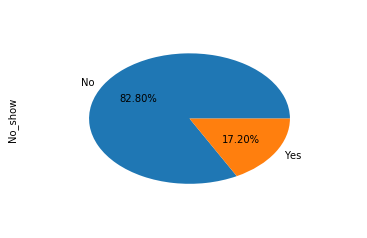

In [34]:
# Dataframe for the patient with Hypertension
df_hyper_1 = df[df['Hypertension'] == 1]
df_hyper_1_show = df_hyper_1['No_show'].value_counts()
df_hyper_1_show.plot(kind='pie',autopct='%.2f%%',radius=0.75);

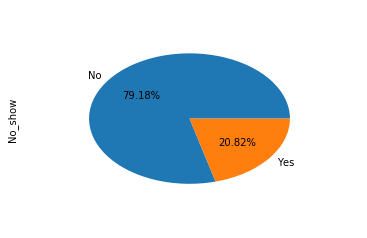

In [35]:
# Dataframe for the patient without Hypertension
df_hyper_0 = df[df['Hypertension'] == 0]
df_hyper_0_show = df_hyper_0['No_show'].value_counts()
df_hyper_0_show.plot(kind='pie',autopct='%.2f%%',radius=0.75);

**Hypertension** : The patient with Hypertension attend 3.62% more than the patient without Hypertension

### Relation between Diabete and Attendance

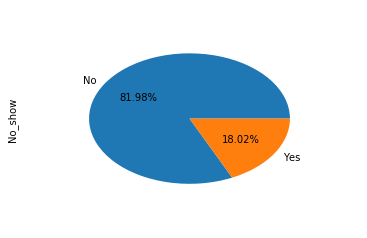

In [36]:
# Dataframe for the patient with Diabete
df_dia_1 = df[df['Diabetes'] == 1]
df_dia_1_show = df_dia_1['No_show'].value_counts()
df_dia_1_show.plot(kind='pie',autopct='%.2f%%',radius=0.75);

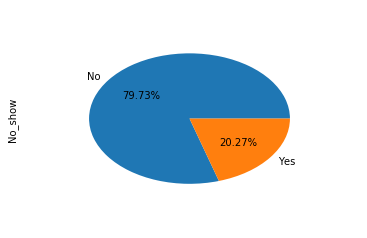

In [37]:
# Dataframe for the patient without Diabete
df_dia_0 = df[df['Diabetes'] == 0]
df_dia_0_show = df_dia_0['No_show'].value_counts()
df_dia_0_show.plot(kind='pie',autopct='%.2f%%',radius=0.75);

**Diabete** : The patient with Diabetes attend 2.25% more than the patient without Diabetes

<a id='conclusions'></a>
## Conclusions

> **Show Appointment**: 79.89% of the people in the dataset attend for the appointment <br>
> **Gender**: There are 65% of women on this data set. 79.76% of women show up for the appointment and and 80.14% of men did the same <br>
**Age**: The mean age is 37 and there are people of all ages from 0 to 115. <br>
**SMS_Received**: 72.43% of patient who received a SMS attend. But also 80.28% of people who didn't receive a SMS attend also. So the SMS can be use to inncrease the attendance for a certain grou pf patient. <br>
**Handicap**: The majority of people who attend dont have any handicap <br>
**Ages and Attendance**: The old and senior people attend more than young and junior. The probability of old to attend is 84.43% and the probability for young to attend is 77.51% : 6.92 difference <br>
**Diabete**: The patient with Diabetes attend 2.25% more than the patient without Diabetes <br>
**Hypertension**: The patient with Hypertension attend 3.62% more than the patient without Hypertension <br>

> **Limitation of the exploration** : To check any impact of the Neighbourhood on the attendance of the patient <br>
To check any relation between ScheduleDay and AppointmenDay <br>

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

### Some References : 
**Google.com** to find some solved issues coding : Plot, Dataframe selection... 
**https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot** to check some illustrations of matplotlib.pyplot
https://github.com/rzgarcia/Medical-appointment-no-show/blob/master/Medical%20Appointment%20No%20Shows%20Investigation_Ruoxi%20ZHAO2.0.ipynb // This was an example of analysis found on the no-show appointment
https://stackoverflow.com/questions/19852215/how-to-add-a-legend-to-matplotlib-pie-chart
https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0